<a href="https://www.kaggle.com/code/tarikemre/simplelinearregression?scriptVersionId=159208505" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/random-linear-regression/train.csv")

In [4]:
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [5]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [6]:
df = df.dropna()

In [7]:
from sklearn.model_selection import train_test_split

# Örnek: x ve y sütunlarını içeren bir DataFrame (df)
X = df[['x']]
y = df['y']

# Veriyi %80 eğitim, %20 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression

# Modeli oluştur
model = LinearRegression()


In [9]:
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 7.752986666319193
R-squared: 0.9910998765243975


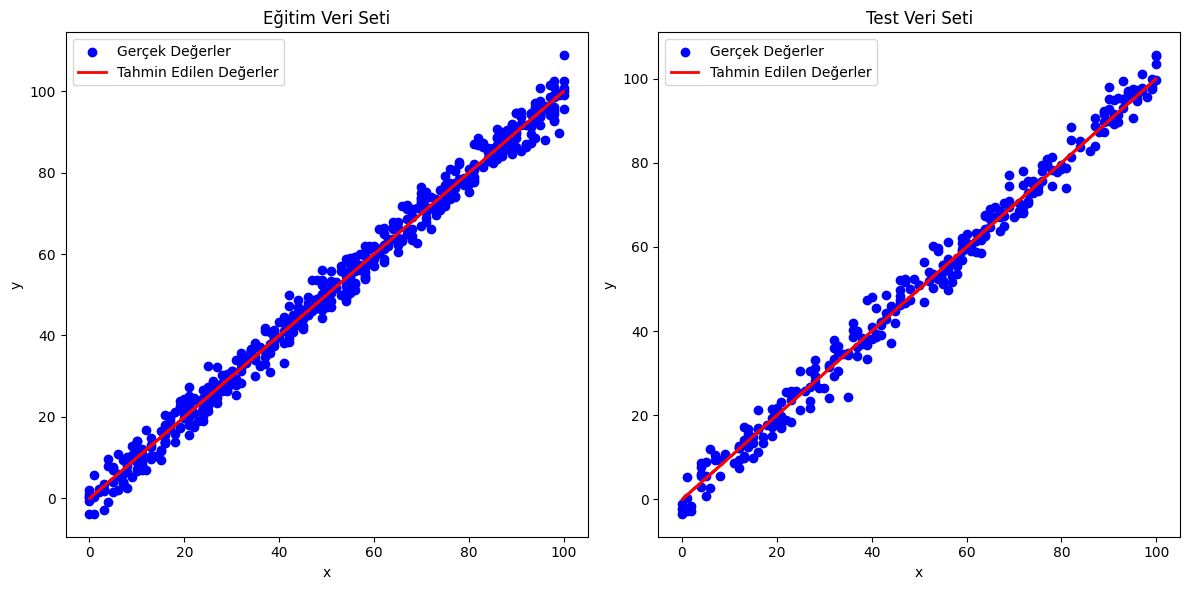

In [12]:

test_data = pd.read_csv('/kaggle/input/random-linear-regression/test.csv')


X_test = test_data[['x']]
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Gerçek Değerler')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Tahmin Edilen Değerler')
plt.title('Eğitim Veri Seti')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(X_test, test_data['y'], color='blue', label='Gerçek Değerler')
plt.plot(X_test, y_pred_test, color='red', linewidth=2, label='Tahmin Edilen Değerler')
plt.title('Test Veri Seti')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()
